# Course Project for COMP 4151 and 6151

**Part 1 is due on Oct 7, 2021. Before Class**


The goal of the project is let you uncover interesting relationships from a given dataset.

The project consists of a sequence of weekly assignments and reports.

The dataset you will work on has information about colleges and universities.  

All of us have seen this data for the first time.  In other words, we do not know if any interesting relationships exist in this data.

To uncover interesting relationships, we need to:

1. Ask interesting questions to hypothesize about a relationship.
2. Model and validate the relationship.

In this course, we have learned how to model a relationship between a set of features X, and a target variable y.  Technically, this can be done easily with sklearn, after we select a model: 
```
    model.fit(X,y)
```

In in-class examples or assignments, we are often told what X and y should be.  Here, we are not told what X and y are, because we do not know what they are.  The goal of the project is to discover what they are.

Technically, once we hypothesize about a relationship between X and y, we can evaluate that relationship by **cross-validating the model**.

At this time, you should already know the technical requirements and steps to model relationships and evaluate those relationships.

**Expectations**

+ Come up with *interesting* questions.
+ Come up with *interesting* hypotheses.
+ Demonstrate your technical ability by properly *modeling* the relationships in your hypotheses.
+ Demonstrate your technical ability by properly *evaluating* your hypotheses.
+ Draw proper conclusion. Analyze your hypotheses and possibly revise and improve them.

If a relationship between X and y appears *interesting* to people, either a positive confirmation or a lack of confirmation (rebuttal or disconfirmation) is valuable.

### The dataset

In [4]:
import pandas
df = pandas.read_csv('../Datasets/college_data.csv')

In [5]:
print('There are', len(df.columns), 'columns.')
print(df.columns)

There are 145 columns.
Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)


### An example of a hypothesis

Hypothesis: there is a relationship between the number of graduated BS's and the percent of admission.

To verify this hypothesis, we need 
1. Determine what X and y are.
2. Attempt to visualize the relationship to see if there is one. This is problematic if X is multidimensional.
3. Attempt to model and (cross)validate the relationship.
4. Draw your conclusions.  Possibly go back to step 1, or revise our hypothesis.

#### Determining features (X) and the target variable (y)

Figure out which columns are needed. There are many ways to do this.

In [6]:
[col for col in df.columns if 'award' in col]

["Associate's degrees awarded",
 "Bachelor's degrees awarded",
 "Master's degrees awarded",
 "Doctor's degrese - research/scholarship awarded",
 "Doctor's degrees - professional practice awarded",
 "Doctor's degrees - other awarded",
 'Certificates of less than 1-year awarded',
 'Certificates of 1 but less than 2-years awarded',
 'Certificates of 2 but less than 4-years awarded',
 'Postbaccalaureate certificates awarded',
 "Post-master's certificates awarded"]

In [7]:
[col for col in df.columns if 'Tuition' in col]

['Tuition and fees, 2010-11',
 'Tuition and fees, 2011-12',
 'Tuition and fees, 2012-13',
 'Tuition and fees, 2013-14']

In [8]:
[col for col in df.columns if 'admit' in col]

['Percent admitted - total']

In [9]:
my_data = df[['Percent admitted - total', "Bachelor's degrees awarded"]]
print('Data points:', len(my_data))
print(my_data.isna().sum())
print('After removing missing data:', len(my_data.dropna()))
print(my_data.head())

Data points: 1534
Percent admitted - total      158
Bachelor's degrees awarded      2
dtype: int64
After removing missing data: 1376
   Percent admitted - total  Bachelor's degrees awarded
0                      90.0                       604.0
1                      87.0                      2195.0
2                       NaN                        68.0
3                      81.0                      1099.0
4                      51.0                       600.0


In [10]:
print('Removing missing data.')
my_data = my_data.dropna()
print(my_data)

Removing missing data.
      Percent admitted - total  Bachelor's degrees awarded
0                         90.0                       604.0
1                         87.0                      2195.0
3                         81.0                      1099.0
4                         51.0                       600.0
5                         57.0                      5000.0
...                        ...                         ...
1516                      60.0                       148.0
1525                      44.0                       826.0
1529                      35.0                       556.0
1530                      71.0                        75.0
1532                      53.0                        20.0

[1376 rows x 2 columns]


#### Modeling and validating the relationship

This is a regression problem. [Skip explanation]

X is 1-dimensional. Let's visualize this relationship.

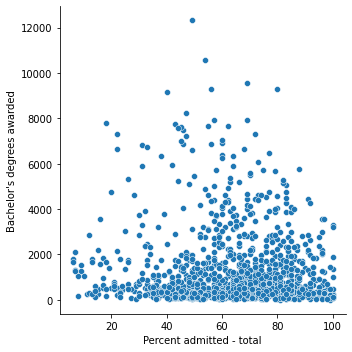

In [11]:
import seaborn
seaborn.relplot(data=my_data, x="Percent admitted - total", y="Bachelor's degrees awarded")

This doesn't look like there's a relationship.  Let's validate the model.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_validate

X = my_data[['Percent admitted - total']]
y = my_data[["Bachelor's degrees awarded"]]
model = LinearRegression()
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
result['test_score'].mean()

-0.006021118622919486

Based on averaged R2 scores of 100 shuffle and split cross validation, there does not seem to be a linear relationshiop between the number of BS degrees awarded and the percentage of admission.

Please see the HTML-formatted report.

### Part 1 of the Project

**Deadline: Oct 7, 2021. Before Class**

**Problem 1**
Plot the geographical locations of the colleges and universities.

In [1]:
from matplotlib import pyplot

<AxesSubplot:xlabel='Longitude location of institution', ylabel='Latitude location of institution'>

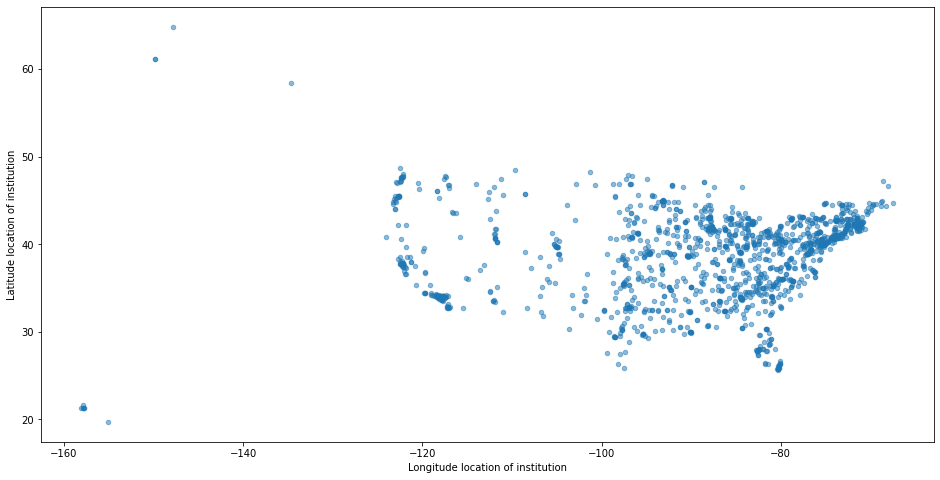

In [17]:
df.plot.scatter(x='Longitude location of institution', 
                y='Latitude location of institution',
                alpha=0.5,
                cmap = pyplot.get_cmap('jet'),
                figsize=(16,8))

**Problem 2** Plot the numbers of colleges/universities in each state.

<AxesSubplot:xlabel='State abbreviation'>

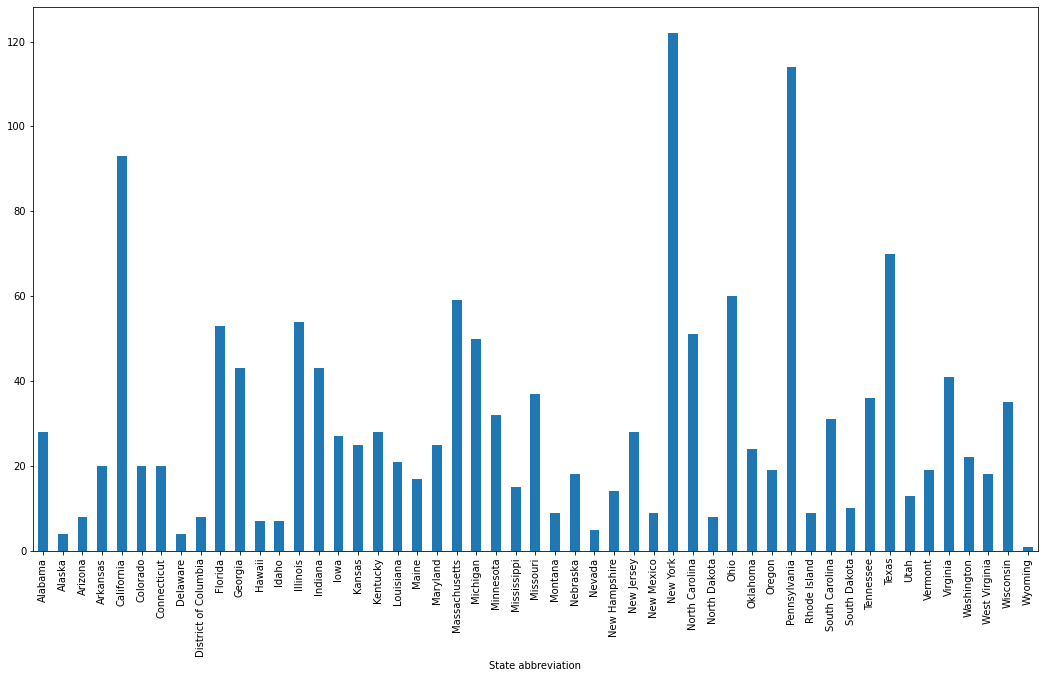

In [18]:
df1 = df.groupby(["State abbreviation"]).size() #group and count number of colleges/universities by state.
df1.plot(kind = "bar",figsize = (18,10)) #Plot the numbers of colleges/universities in each state.

**Problem 3** Plot the distributions of tuitions.

In [19]:
df2 = df.groupby('State abbreviation').mean()[[col for col in df.columns if 'Tuition' in col]].round(2)
df2

,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14"
State abbreviation,,,,
Alabama,11481.37,12271.11,12822.93,13308.85
Alaska,10508.50,10863.50,11793.50,11408.50
Arizona,15089.71,16490.00,17287.29,17798.29
Arkansas,11352.80,12060.05,12591.05,13082.90
California,20947.20,22282.93,22853.11,23475.69
Colorado,14315.55,15090.40,15857.40,16632.40
Connecticut,26732.94,27764.00,28877.33,29866.50
Delaware,11702.25,12320.75,12780.00,13247.00
District of Columbia,26064.50,27151.75,28340.12,29321.75


<AxesSubplot:xlabel='State abbreviation'>

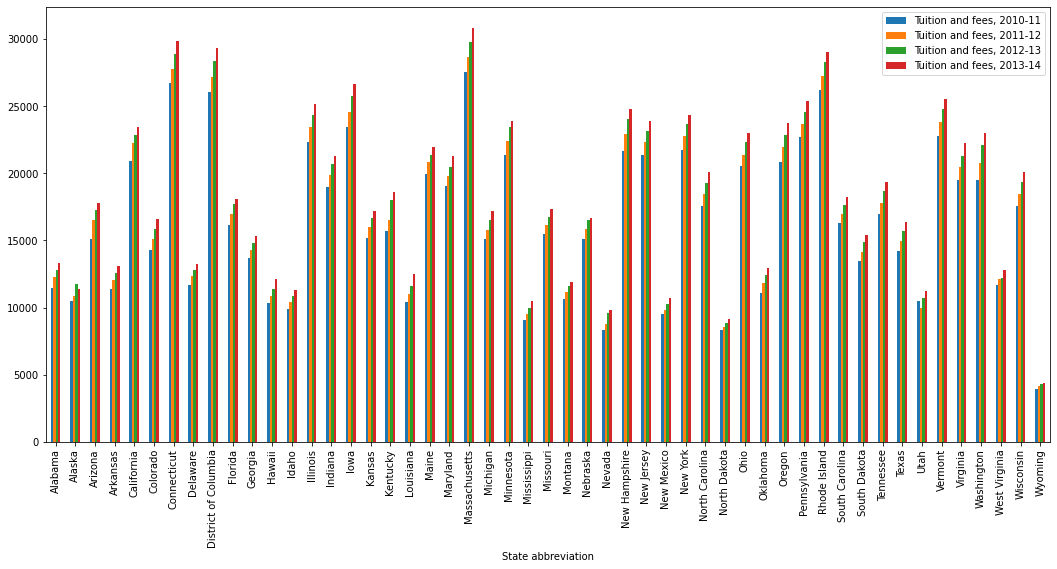

In [20]:
df2.plot(kind = "bar", figsize=(18,8) )  #Plot the distributions of tuitions.

**Problem 4** Divide the colleges and universities into 5 groups based on their tuitions.

The categories can be numeric, where 1 is the least expensive, and 5 is the most expensive.

In [21]:
[col for col in df.columns if 'Tuition' in col]

['Tuition and fees, 2010-11',
 'Tuition and fees, 2011-12',
 'Tuition and fees, 2012-13',
 'Tuition and fees, 2013-14']

In [33]:
df['CostCat'] = pandas.cut(df['Tuition and fees, 2013-14'], 5, labels =['Cheap','OK','Average','Expensive','VeryExpensive'])
df[['Name','Tuition and fees, 2013-14','CostCat']]

,Name,"Tuition and fees, 2013-14",CostCat
0,Alabama A & M University,7182.0,Cheap
1,University of Alabama at Birmingham,7206.0,Cheap
2,Amridge University,6870.0,Cheap
3,University of Alabama in Huntsville,9192.0,Cheap
4,Alabama State University,8720.0,Cheap
...,...,...,...
1529,University of South Florida-Sarasota-Manatee,5587.0,Cheap
1530,The Kingâ€™s College,31300.0,Expensive
1531,Ottawa University-Online,NaN,NaN
1532,Providence Christian College,24222.0,Average


**Problem 5** Compare the graduation rate (BS degree) of colleges across the 5 groups.

In [31]:
[col for col in df.columns if 'rate' in col]

['Graduation rate - Bachelor degree within 4 years, total',
 'Graduation rate - Bachelor degree within 5 years, total',
 'Graduation rate - Bachelor degree within 6 years, total']

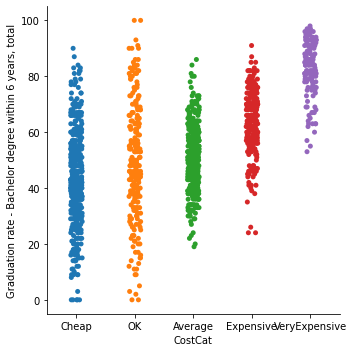

In [35]:
seaborn.catplot(data=df, x='CostCat', y='Graduation rate - Bachelor degree within 6 years, total')

**Problem 6** Come up with 3 hypotheses about the 3 different relationships.

##### Hypotheses:
- Hypothese 1: there is a relationship between number of graduate BS's and tuition.
- Hypothese 2: there is a relationship between number of graduate BS's and sector of institution.
- Hypothese 3: there is a relationship between tuition and percent of freshmen receiving any financial aid.